In [5]:
#Better notebook
import numpy as np
import matplotlib.pyplot as plt


In [30]:
def state_plot(theta, omega, k1, k2, I):
    time = 0
    dt = 0.1
    time_list = [0]
    theta_list = [theta]
    omega_list = [omega]
    error = abs(theta) + abs(omega)
    while error > 0.01:
        theta_1 = theta + omega*dt
        theta_list.append(theta_1)
        omega = omega + ((-k1/I)*theta + (-k2/I)*omega)*dt
        omega_list.append(omega)
        theta = theta_1
        time += dt
        time_list.append(time)
        error = abs(theta) + abs(omega)
        if time >= 1000:
            break
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('Angular Position (rad)', color=color)
    ax1.plot(time_list, theta_list, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel('Angular Velocity (rad/s)', color=color)
    ax2.plot(time_list, omega_list, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.savefig(str(k1) + "," + str(k2)+ ".png")

In [3]:
def effeciency(theta, omega, k1, k2, I):
    time = 0
    dt = 0.1
    error = abs(theta) + abs(omega)
    while error > 0.01:
        theta_1 = theta + omega*dt
        omega = omega + ((-k1/I)*theta + (-k2/I)*omega)*dt
        theta = theta_1
        time += dt
        error = abs(theta) + abs(omega)
    return time

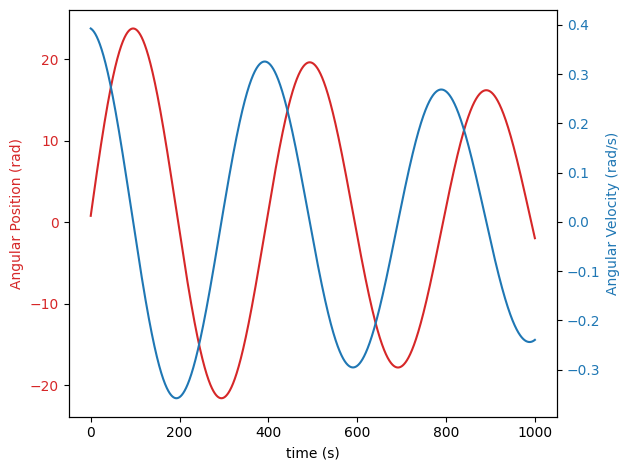

In [46]:
effeciency(np.pi/4,np.pi/8,24,1000,10000)
state_plot(np.pi/4,np.pi/8,.25,.99,1000)

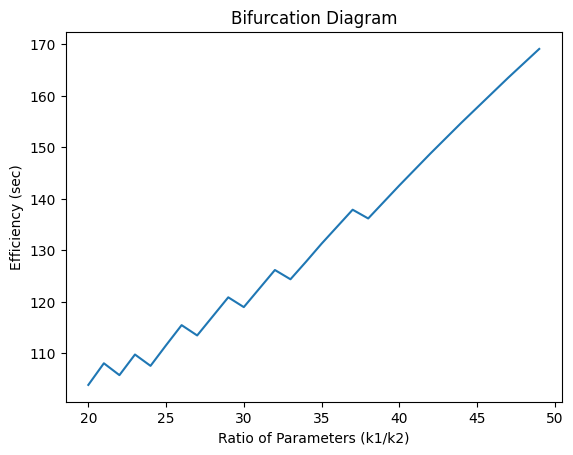

In [49]:
time_k1 = []
k1_list = list(range(20,50,1))
for k1 in k1_list:
    time_k1.append(effeciency(np.pi/4,np.pi/8,k1,10,100))

plt.plot(k1_list, time_k1)
plt.title("Bifurcation Diagram")
plt.xlabel("Ratio of Parameters (k1/k2)")
plt.ylabel("Efficiency (sec)")
plt.show()